<a href="https://colab.research.google.com/github/celsoneto2002/Apresenta-aoSemanaAcademica/blob/main/codigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tabela de 2014 a 2024:


,Ano,Total_Casos
0,2014,7846
1,2015,73705
2,2016,88427
3,2017,11010
4,2018,14857
5,2019,32075
6,2020,4491
7,2021,2697
8,2022,11139
9,2023,49950


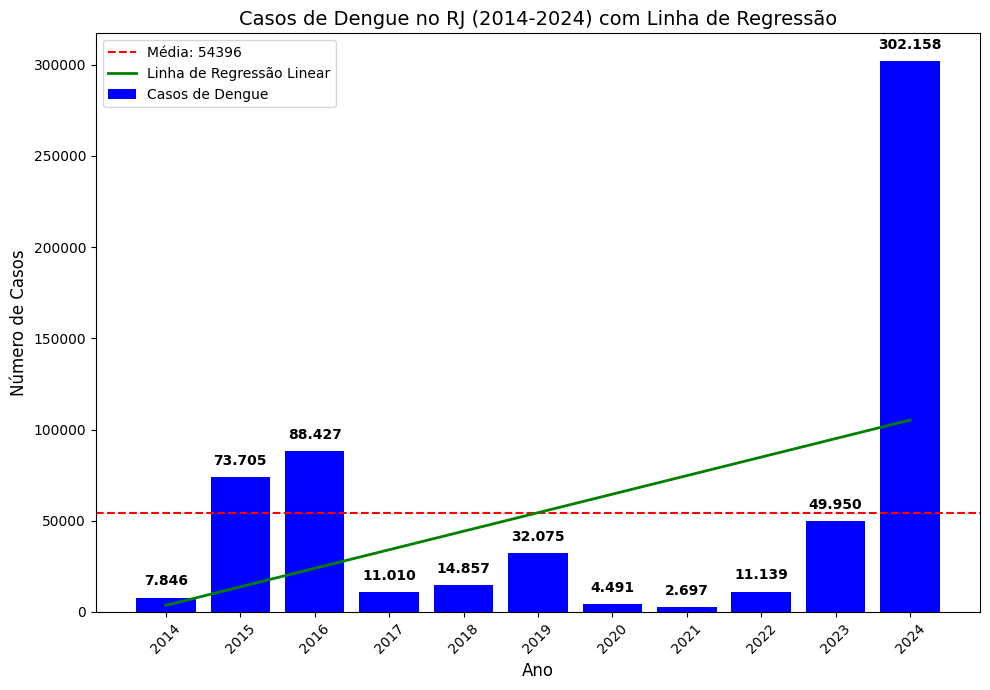

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from IPython.display import display

plt.rcParams["figure.figsize"] = (10, 7)

arquivo = "DadosDengueRJ.csv"
dados = pd.read_csv(arquivo, sep=";", encoding="latin1", skiprows=5)

dados.rename(columns={dados.columns[0]: "Ano"}, inplace=True)
coluna_total = dados.columns[-1]
tabela = dados[["Ano", coluna_total]].copy()
tabela.rename(columns={coluna_total: "Total_Casos"}, inplace=True)

tabela["Ano"] = pd.to_numeric(tabela["Ano"], errors="coerce")
tabela["Total_Casos"] = pd.to_numeric(tabela["Total_Casos"], errors="coerce")

tabela = tabela[(tabela["Ano"] >= 2014) & (tabela["Ano"] <= 2024)]

anos = pd.DataFrame({"Ano": range(2014, 2025)})
tabela = pd.merge(anos, tabela, on="Ano", how="left")
tabela["Total_Casos"] = tabela["Total_Casos"].fillna(0).astype(int)

print("Tabela de 2014 a 2024:")
display(tabela)

media_casos = tabela["Total_Casos"].mean()

X = tabela["Ano"].values.reshape(-1, 1)
y = tabela["Total_Casos"].values

modelo = LinearRegression()
modelo.fit(X, y)
y_pred = modelo.predict(X)

plt.figure(figsize=(10, 7))

plt.bar(tabela["Ano"], tabela["Total_Casos"], color='blue', label='Casos de Dengue')

for i, v in enumerate(tabela["Total_Casos"]):
    plt.text(tabela["Ano"].iloc[i], v + 5000, "{:,.0f}".format(v).replace(",", "."), ha='center', va='bottom', fontweight='bold')

plt.axhline(y=media_casos, color='red', linestyle='--', label=f'Média: {media_casos:.0f}')

plt.plot(tabela["Ano"], y_pred, color='green', linestyle='-', linewidth=2, label='Linha de Regressão Linear')

plt.title('Casos de Dengue no RJ (2014-2024) com Linha de Regressão', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Número de Casos', fontsize=12)
plt.xticks(tabela["Ano"], rotation=45)
plt.legend()
plt.tight_layout()

plt.show()
